In [2]:
import pandas as pd

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Concatenation

**concat() function does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes.**

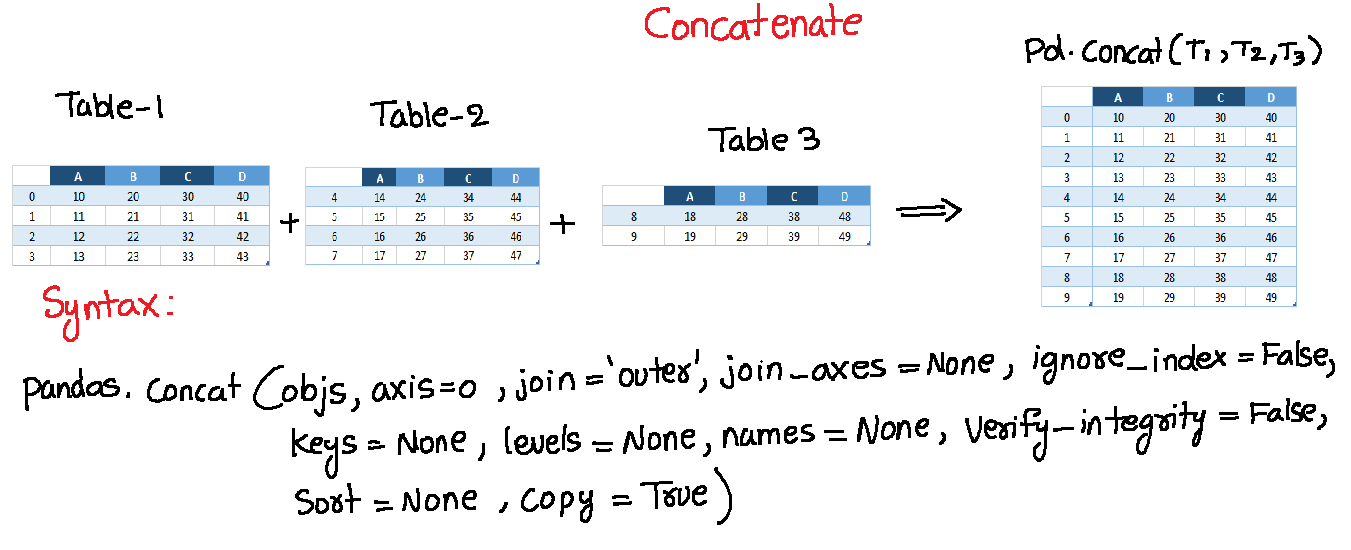

In [3]:
from IPython.display import Image
Image('1.png')

In [4]:
Table1 = pd.DataFrame({'A': ['10', '11', '12', '13'],
                    'B': ['20', '21', '22', '23'],
                    'C': ['30', '31', '32', '33'],
                    'D': ['40', '41', '42', '43']},
                    index=[0, 1, 2, 3])
Table1

,A,B,C,D
0,10,20,30,40
1,11,21,31,41
2,12,22,32,42
3,13,23,33,43


In [5]:
Table2 = pd.DataFrame({'A': ['14', '15', '16', '17'],
                    'B': ['24', '25', '26', '27'],
                    'C': ['34', '35', '36', '37'],
                    'D': ['44', '45', '46', '47']},
                    index=[4, 5, 6, 7])
Table2

,A,B,C,D
4,14,24,34,44
5,15,25,35,45
6,16,26,36,46
7,17,27,37,47


In [6]:
Table3 = pd.DataFrame({'A': ['18', '19'],
                    'B': ['28', '29'],
                    'C': ['38', '39'],
                    'D': ['48', '49']},
                   index=[8, 9])
Table3

,A,B,C,D
8,18,28,38,48
9,19,29,39,49


In [7]:
df = [Table1, Table2, Table3]

In [8]:
pd.concat(df, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

,A,B,C,D
0,10,20,30,40
1,11,21,31,41
2,12,22,32,42
3,13,23,33,43
4,14,24,34,44
5,15,25,35,45
6,16,26,36,46
7,17,27,37,47
8,18,28,38,48
9,19,29,39,49


In [9]:
Data = pd.concat([Table1, Table2, Table3])
Data

,A,B,C,D
0,10,20,30,40
1,11,21,31,41
2,12,22,32,42
3,13,23,33,43
4,14,24,34,44
5,15,25,35,45
6,16,26,36,46
7,17,27,37,47
8,18,28,38,48
9,19,29,39,49


In [10]:
pd.concat(df, keys=['x', 'y', 'z'])

A   B   C   D
x 0  10  20  30  40
  1  11  21  31  41
  2  12  22  32  42
  3  13  23  33  43
y 4  14  24  34  44
  5  15  25  35  45
  6  16  26  36  46
  7  17  27  37  47
z 8  18  28  38  48
  9  19  29  39  49

In [11]:
Output = pd.concat([Table1, Table2], axis=1, join='inner')#,join_axes=[df1.index]
Output

,A,B,C,D,A,B,C,D


In [12]:
Output = pd.concat([Table1, Table2], axis=1, join_axes=[Table1.index])
Output

,A,B,C,D,A,B,C,D
0,10,20,30,40,NaN,NaN,NaN,NaN
1,11,21,31,41,NaN,NaN,NaN,NaN
2,12,22,32,42,NaN,NaN,NaN,NaN
3,13,23,33,43,NaN,NaN,NaN,NaN


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Merge

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

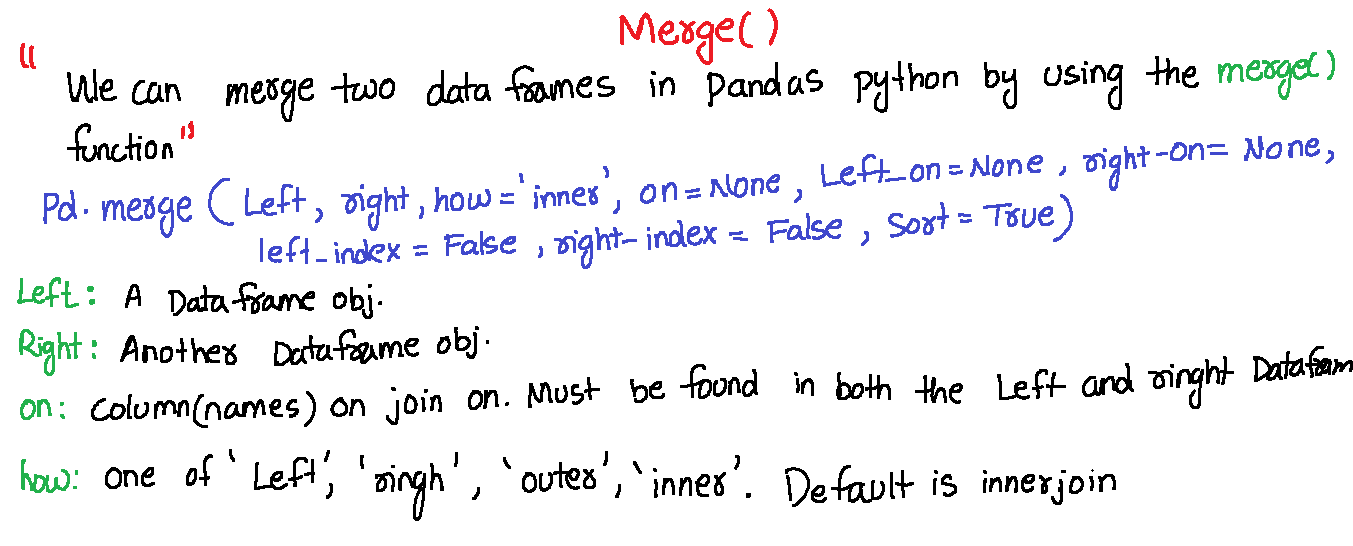

In [13]:
Image('2.png')

In [14]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [15]:
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Inner Join

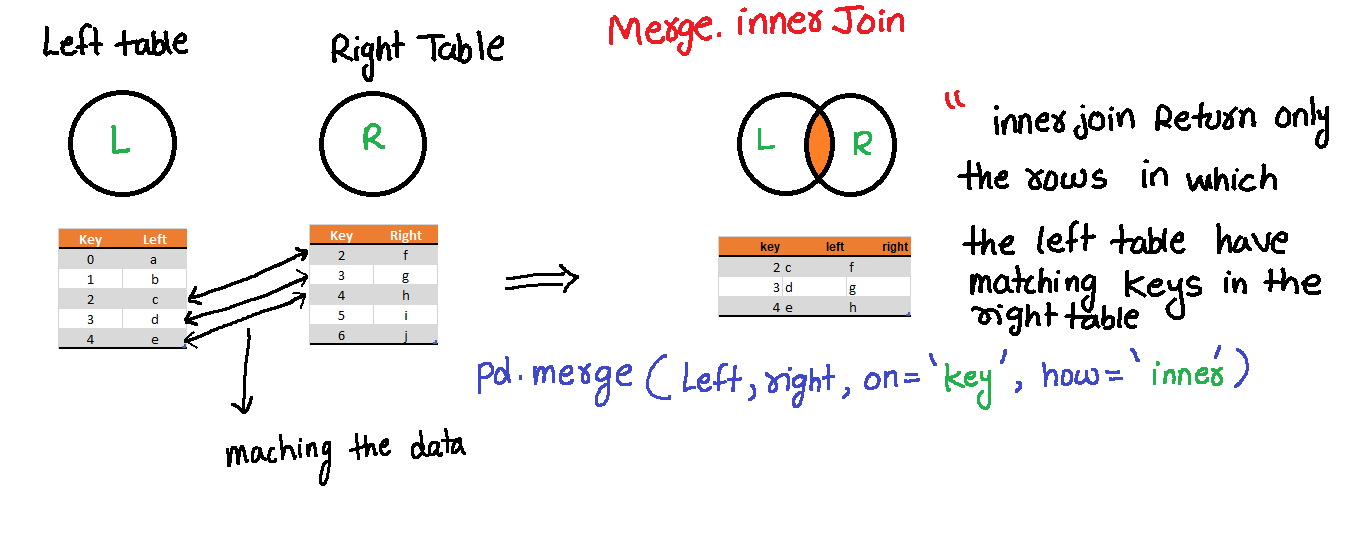

In [16]:
Image('2.1.png')

In [17]:
pd.merge(left_frame, right_frame, on='key', how='inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;">Outer Join

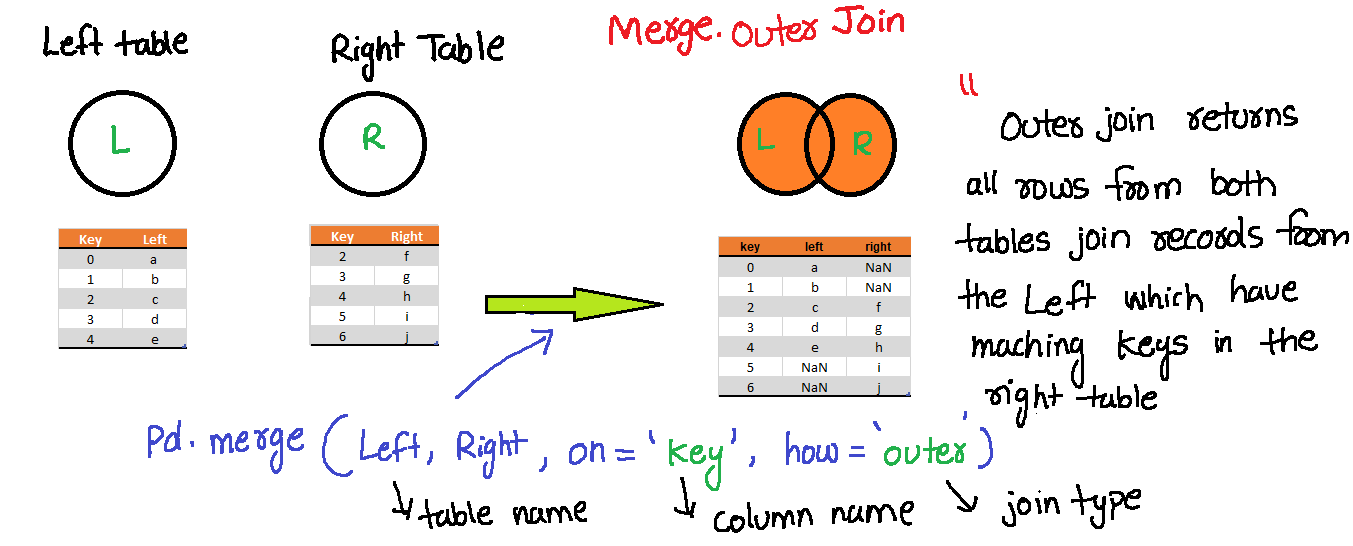

In [18]:
Image('2.2.png')

In [19]:
pd.merge(left_frame, right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Right Join

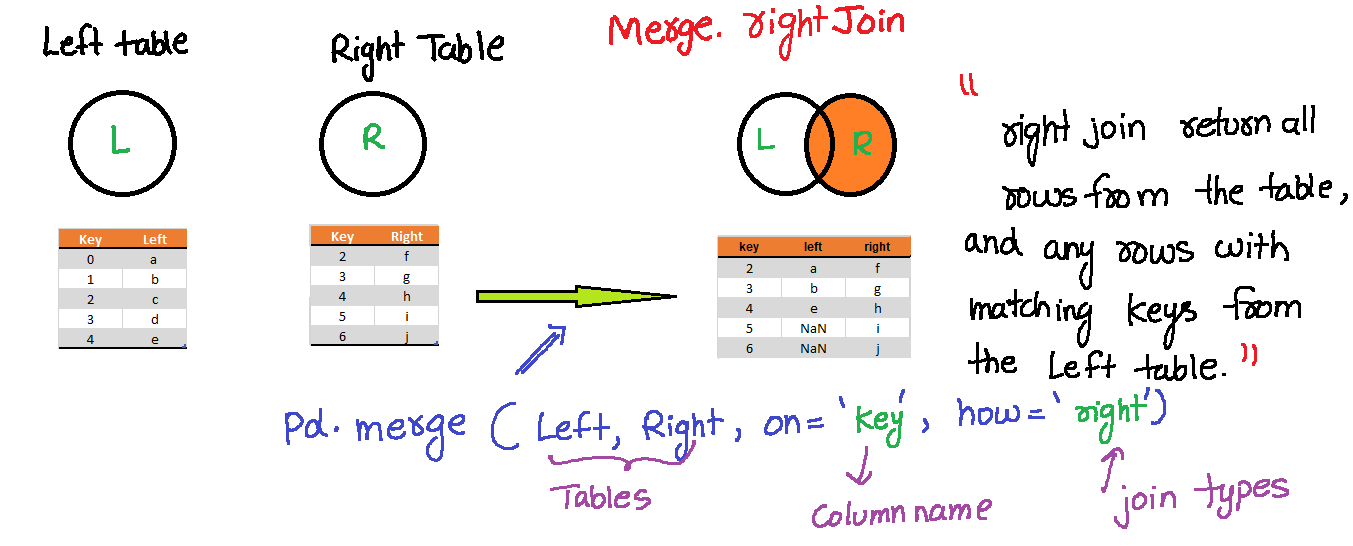

In [20]:
Image('2.3.png')

In [21]:
pd.merge(left_frame, right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Left Join

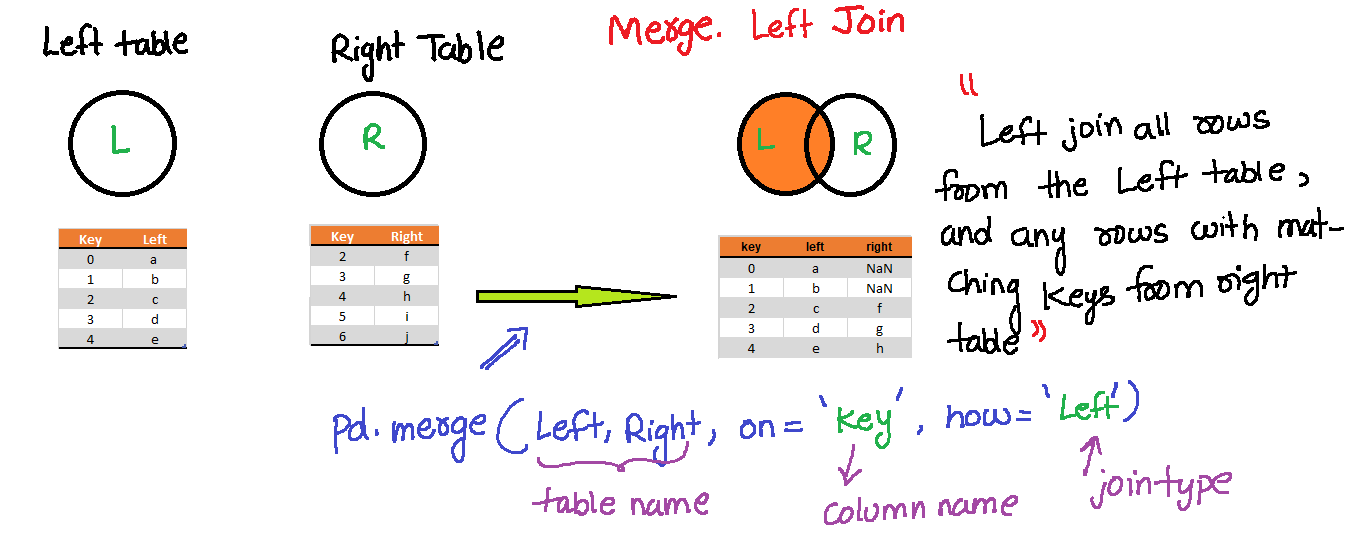

In [22]:
Image('2.4.png')

In [23]:
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Reshape:
    
1. stack
2. unstack 
3. melt 

#### Create multiple header dataframe:

In [24]:
header = pd.MultiIndex.from_product([['3_Months','6_Months'],['Python','ML']])
d=([[12,45,67,56],[78,89,45,67],[45,67,89,90],[67,44,56,55]])

In [25]:
df = pd.DataFrame(d,
                  index=['Jony','Anil','Sunil','Rocky'],
                  columns=header)
df

3_Months     6_Months    
        Python  ML   Python  ML
Jony        12  45       67  56
Anil        78  89       45  67
Sunil       45  67       89  90
Rocky       67  44       56  55

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Stack the dataframe:

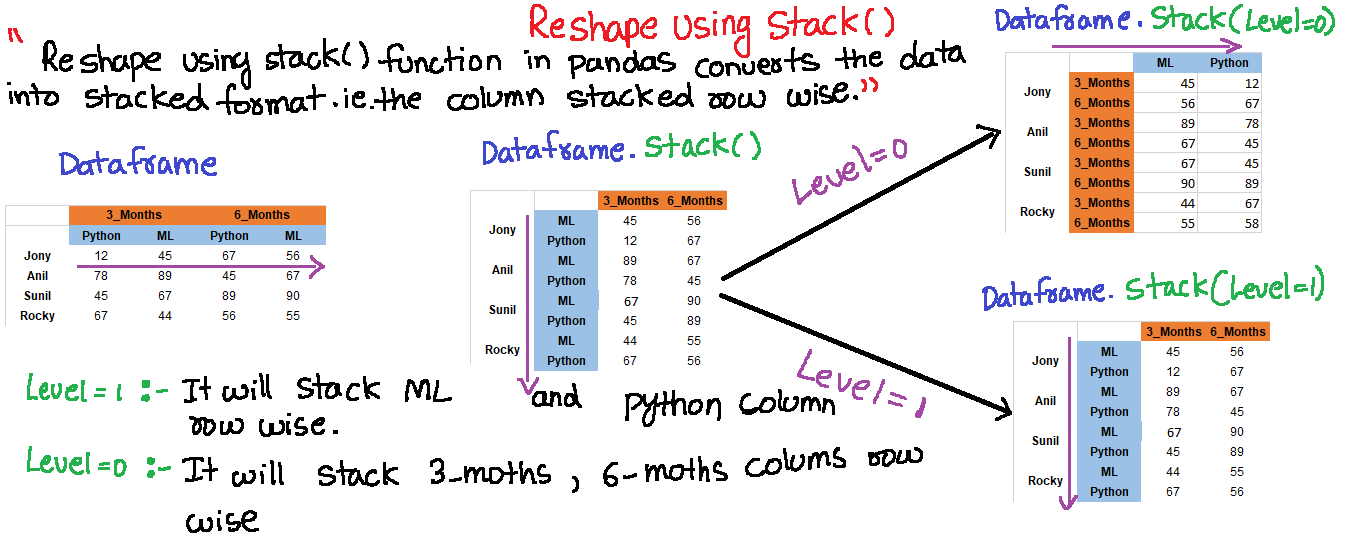

In [26]:
Image('3.1.png')

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Stack()

**Note:** Stack() Function in dataframe stacks the column to rows at level 1 (default).

In [27]:
stacked_df=df.stack()
stacked_df

3_Months  6_Months
Jony  ML            45        56
      Python        12        67
Anil  ML            89        67
      Python        78        45
Sunil ML            67        90
      Python        45        89
Rocky ML            44        55
      Python        67        56

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> stack(level=0)

In [28]:
stacked_df=df.stack(level=0)
stacked_df

ML  Python
Jony  3_Months  45      12
      6_Months  56      67
Anil  3_Months  89      78
      6_Months  67      45
Sunil 3_Months  67      45
      6_Months  90      89
Rocky 3_Months  44      67
      6_Months  55      56

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> stack(level=1)

In [29]:
stacked_df=df.stack(level=1)
stacked_df

3_Months  6_Months
Jony  ML            45        56
      Python        12        67
Anil  ML            89        67
      Python        78        45
Sunil ML            67        90
      Python        45        89
Rocky ML            44        55
      Python        67        56

In [30]:
stacked_df=df.stack()
stacked_df

3_Months  6_Months
Jony  ML            45        56
      Python        12        67
Anil  ML            89        67
      Python        78        45
Sunil ML            67        90
      Python        45        89
Rocky ML            44        55
      Python        67        56

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Unstack the dataframe:
    
unstack() Function in dataframe unstacks the row to columns . Basically it’s a reverse of stacking

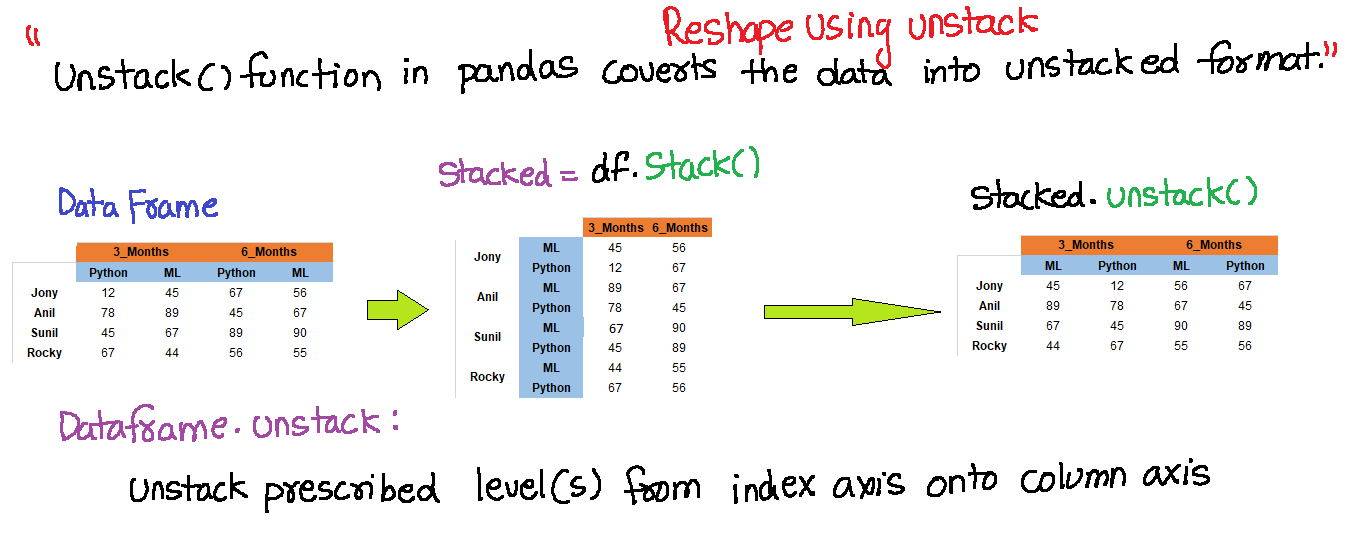

In [31]:
Image('3.2.png')

In [32]:
# unstack the dataframe
unstacked_df = stacked_df.unstack()
unstacked_df

3_Months        6_Months       
            ML Python       ML Python
Jony        45     12       56     67
Anil        89     78       67     45
Sunil       67     45       90     89
Rocky       44     67       55     56

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> melt()

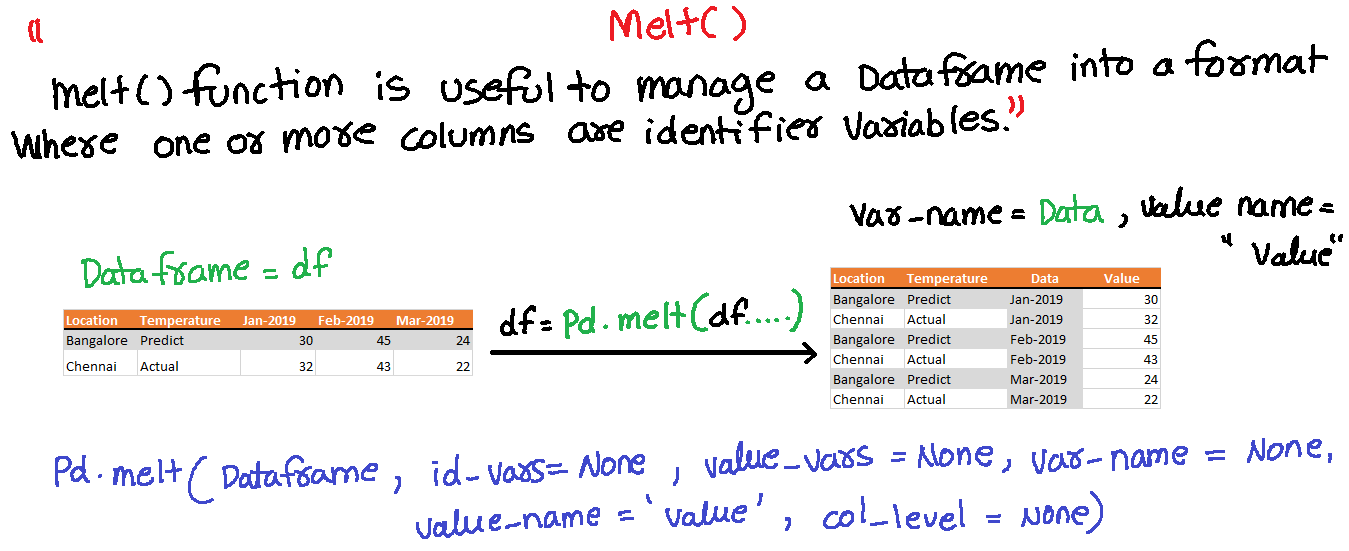

In [33]:
Image('3.3.png')

In [34]:
data = {
    "location":['Bangalore', 'Chennai'],
    "Temperature" : ["Predict", "Actual"],
    "Jan-2019":[30, 32],
    "Feb-2019":[45, 43],
    "Mar-2019":[24, 22]
}
df = pd.DataFrame(data, columns=['location', 'Temperature','Jan-2019', 'Feb-2019', 'Mar-2019'])
print(df)

    location Temperature  Jan-2019  Feb-2019  Mar-2019
0  Bangalore     Predict        30        45        24
1    Chennai      Actual        32        43        22


In [35]:
df2 = pd.melt(df, id_vars=["location", "Temperature"], var_name="Date", value_name="Value")
print(df2)

    location Temperature      Date  Value
0  Bangalore     Predict  Jan-2019     30
1    Chennai      Actual  Jan-2019     32
2  Bangalore     Predict  Feb-2019     45
3    Chennai      Actual  Feb-2019     43
4  Bangalore     Predict  Mar-2019     24
5    Chennai      Actual  Mar-2019     22


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Pivot Table

In [36]:
#Create a DataFrame
d = {
    'Name':['Jony','Anil','Sunil','Jony','Anil','Rocky',
            'Jony','Anil','Sunil','Jony','Anil','Rocky'],
    'Exam_Months':['3_Months','3_Months','3_Months','3_Months','3_Months','3_Months',
            '6_Months','6_Months','6_Months','6_Months','6_Months','6_Months'],
     
    'Subject':['Python','Python','SQL','SQL','ML','ML',
               'Python','Python','SQL','SQL','ML','ML'],
   'Score':[62,47,55,74,31,77,85,63,42,67,89,81]}
 
df = pd.DataFrame(d,columns=['Name','Exam_Months','Subject','Score'])
df




,Name,Exam_Months,Subject,Score
0,Jony,3_Months,Python,62
1,Anil,3_Months,Python,47
2,Sunil,3_Months,SQL,55
3,Jony,3_Months,SQL,74
4,Anil,3_Months,ML,31
5,Rocky,3_Months,ML,77
6,Jony,6_Months,Python,85
7,Anil,6_Months,Python,63
8,Sunil,6_Months,SQL,42
9,Jony,6_Months,SQL,67


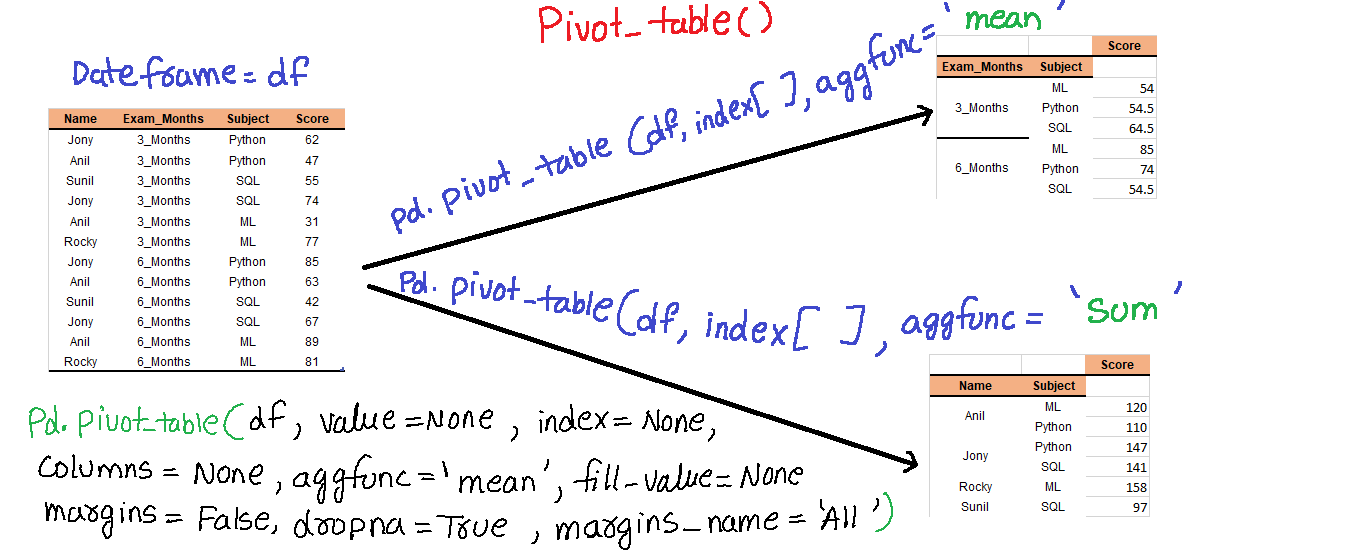

In [37]:
Image('4.png')

### Create pivot table in pandas python with aggregate function mean:

In [38]:
pd.pivot_table(df, index=['Exam_Months','Subject'], aggfunc='mean')


Score
Exam_Months Subject       
3_Months    ML        54.0
            Python    54.5
            SQL       64.5
6_Months    ML        85.0
            Python    74.0
            SQL       54.5

### Create pivot table in Pandas python with aggregate function sum:

In [39]:
# pivot table using aggregate function sum
 
pd.pivot_table(df, index=['Name','Subject'], aggfunc='sum')

Score
Name  Subject       
Anil  ML         120
      Python     110
Jony  Python     147
      SQL        141
Rocky ML         158
Sunil SQL         97

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> duplicate

In [40]:
#Create a DataFrame
d = {
    'Name':['Jony','Anil','Sunil','Jony','Anil','Rocky',
            'Jony','Anil','Sunil','Jony','Anil','Rocky'],
    'Exam_Months':['3_Months','3_Months','6_Months','3_Months','3_Months','3_Months',
            '3_Months','6_Months','6_Months','6_Months','6_Months','6_Months'],
     
    'Subject':['Python','Python','SQL','SQL','ML','ML',
               'Python','Python','SQL','SQL','ML','ML'],
   'Score':[62,47,42,74,31,77,62,63,42,67,89,81]}
 
df = pd.DataFrame(d,columns=['Name','Exam_Months','Subject','Score'])
df




,Name,Exam_Months,Subject,Score
0,Jony,3_Months,Python,62
1,Anil,3_Months,Python,47
2,Sunil,6_Months,SQL,42
3,Jony,3_Months,SQL,74
4,Anil,3_Months,ML,31
5,Rocky,3_Months,ML,77
6,Jony,3_Months,Python,62
7,Anil,6_Months,Python,63
8,Sunil,6_Months,SQL,42
9,Jony,6_Months,SQL,67


####  Drop the duplicate rows:

In [41]:
Data = df.drop_duplicates()
Data

,Name,Exam_Months,Subject,Score
0,Jony,3_Months,Python,62
1,Anil,3_Months,Python,47
2,Sunil,6_Months,SQL,42
3,Jony,3_Months,SQL,74
4,Anil,3_Months,ML,31
5,Rocky,3_Months,ML,77
7,Anil,6_Months,Python,63
9,Jony,6_Months,SQL,67
10,Anil,6_Months,ML,89
11,Rocky,6_Months,ML,81


**Note:** Row = 6,8 is removed

### Drop the duplicate by column:

In [42]:
# drop duplicate by a column name
 
df.drop_duplicates(['Name'], keep='last')

,Name,Exam_Months,Subject,Score
8,Sunil,6_Months,SQL,42
9,Jony,6_Months,SQL,67
10,Anil,6_Months,ML,89
11,Rocky,6_Months,ML,81


**Note:** Now let’s drop the rows by column name. Rows are dropped in such a way that unique column value is retained for that column as shown below

In [43]:
df = pd.read_csv("Humidity1.csv")
df

,date,city,temperature,humidity
0,05-01-2017,new york,65,56
1,05-01-2017,new york,61,54
2,05-02-2017,new york,70,60
3,05-02-2017,new york,71,62
4,05-01-2017,mumbai,75,80
5,05-01-2017,mumbai,78,83
6,05-02-2017,mumbai,82,85
7,05-02-2017,mumbai,80,26


#### Lets check which rows are duplicated

In [44]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

False means no duplication. We checked for the entire row. None of the row is matching with each other completely.

### Lets check for the duplication in certain columns

In [45]:
df.duplicated(['date'])

0    False
1     True
2    False
3     True
4     True
5     True
6     True
7     True
dtype: bool

### Lets check for the duplication in two columns together?

In [46]:
df.duplicated(['date','city'])

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
dtype: bool

In [47]:
df.duplicated(['date','city'], keep='last')

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
dtype: bool

**Keep=** last will throw false when the row is repeated from second time.

### Lets drop duplicates by considering city

In [48]:
df.drop_duplicates(['city'])

,date,city,temperature,humidity
0,05-01-2017,new york,65,56
4,05-01-2017,mumbai,75,80


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> map()

**Series.map(arg, na_action=None)**

Map values of Series according to input correspondence.

Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a 

In [49]:
Season = {'new york':'winter', 'mumbai':'summer'}

### Now lets map the above dataframe "season" in our previous dataframe.

In [50]:
df['Season']=df['city'].map(Season)
df

,date,city,temperature,humidity,Season
0,05-01-2017,new york,65,56,winter
1,05-01-2017,new york,61,54,winter
2,05-02-2017,new york,70,60,winter
3,05-02-2017,new york,71,62,winter
4,05-01-2017,mumbai,75,80,summer
5,05-01-2017,mumbai,78,83,summer
6,05-02-2017,mumbai,82,85,summer
7,05-02-2017,mumbai,80,26,summer


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Replacing

**Replace** is used to replace any value in the dataframe. Lets replace the city new york with some other city

In [51]:
df['city'].replace('new york','Italy')

0     Italy
1     Italy
2     Italy
3     Italy
4    mumbai
5    mumbai
6    mumbai
7    mumbai
Name: city, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> Renaming 

### Lets rename the column 'temperature' with 'temp'

In [52]:
df.rename(columns= {'temperature':'temp'})

,date,city,temp,humidity,Season
0,05-01-2017,new york,65,56,winter
1,05-01-2017,new york,61,54,winter
2,05-02-2017,new york,70,60,winter
3,05-02-2017,new york,71,62,winter
4,05-01-2017,mumbai,75,80,summer
5,05-01-2017,mumbai,78,83,summer
6,05-02-2017,mumbai,82,85,summer
7,05-02-2017,mumbai,80,26,summer


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8707ff;"> groupby() 

In [57]:
Data = df.groupby(['city', 'Season']) 

In [58]:
Data.first() 

,,date,temperature,humidity
city,Season,,,
mumbai,summer,05-01-2017,75,80
new york,winter,05-01-2017,65,56
